<a href="https://colab.research.google.com/github/Tirtayuda12/Machine_Learning-Telu/blob/main/Week%203/Google%20Colab/Week_3_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Tirtayuda Munggarana

NIM : 1103202108

Kelas : TK-44-G04

In [2]:
# Impor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [5]:
# Muat dataset Iris
iris = load_iris()


In [13]:
# Menampilkan sampel data
print(iris.data[:5])  #menampilkan 5 baris awal pada setiap fitur
print(iris.target[:5]) #menampilkan 5 baris awal pada target
print(iris.target_names) #menampilkan berapa banyak jenis target


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


In [14]:
# Buat dataframe dari dataset
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [16]:
# Menampilkan info dari dataframe yang sudah dibuat sebelumnya
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
 5   species            150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [17]:
# Bagi dataset menjadi fitur (X) dan target (y)
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['species']

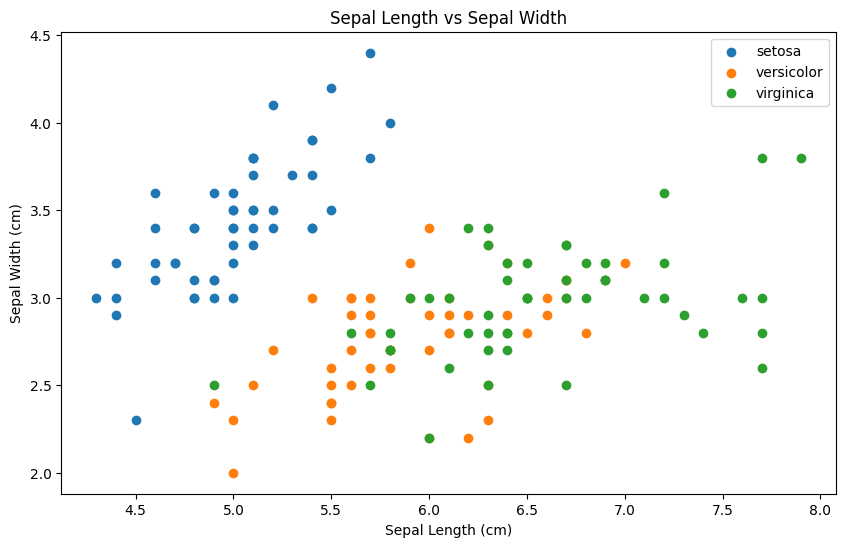

In [19]:
# Menampilkan Scatter plot sepal width dengan sepal length
plt.figure(figsize=(10, 6))
for species in iris.target_names:
    plt.scatter(iris_df[iris_df['species'] == species]['sepal length (cm)'],
                iris_df[iris_df['species'] == species]['sepal width (cm)'],
                label=species)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

In [20]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Buat model KNN
knn = KNeighborsClassifier(n_neighbors=3)  # nilai n menunjukan banyaknya pendekatan

In [22]:
# Melatih model menggunakan data latih
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
# Lakukan prediksi menggunakan model
y_pred_knn = knn.predict(X_test)

In [24]:
# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred_knn)
print("Akurasi KNN:", accuracy)

Akurasi KNN: 1.0


In [25]:
# Buat confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=iris.target_names)

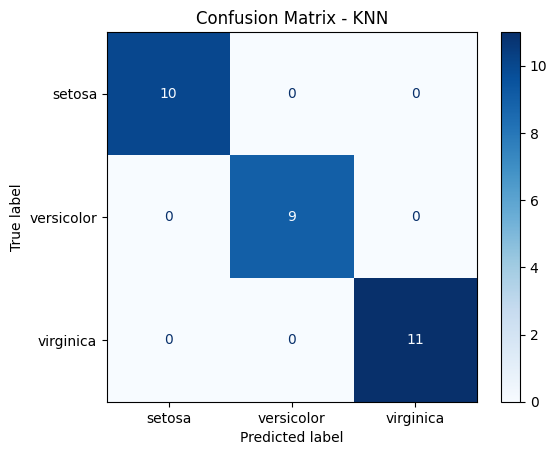

In [27]:
# Visualisasikan confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=iris.target_names)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN')
plt.show()